In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 125MB/s]
100% 1.06G/1.06G [00:06<00:00, 179MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

valid_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [13]:
#normalization
def process(image,label):
  image=tf.cast(image/256.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
valid_ds=valid_ds.map(process)

In [14]:
#model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
157/157 [==============================] - 59s 354ms/step - loss: 2.8676 - accuracy: 0.5638 - val_loss: 3.5574 - val_accuracy: 0.5020
Epoch 2/10
157/157 [==============================] - 55s 352ms/step - loss: 0.8422 - accuracy: 0.6044 - val_loss: 0.7815 - val_accuracy: 0.5901
Epoch 3/10
157/157 [==============================] - 56s 355ms/step - loss: 0.6281 - accuracy: 0.6576 - val_loss: 0.6240 - val_accuracy: 0.6503
Epoch 4/10
157/157 [==============================] - 44s 282ms/step - loss: 0.5700 - accuracy: 0.7026 - val_loss: 0.6247 - val_accuracy: 0.6513
Epoch 5/10
157/157 [==============================] - 43s 271ms/step - loss: 0.5214 - accuracy: 0.7424 - val_loss: 0.6834 - val_accuracy: 0.5965
Epoch 6/10
157/157 [==============================] - 97s 618ms/step - loss: 0.4668 - accuracy: 0.7764 - val_loss: 0.6462 - val_accuracy: 0.7088
Epoch 7/10
157/157 [==============================] - 55s 353ms/step - loss: 0.4198 - accuracy: 0.8020 - val_loss: 0.6027 - val_ac

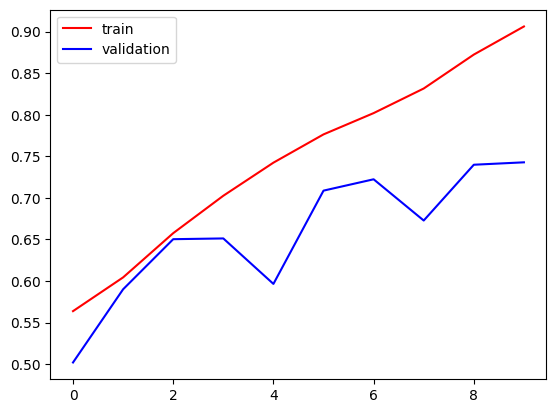

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

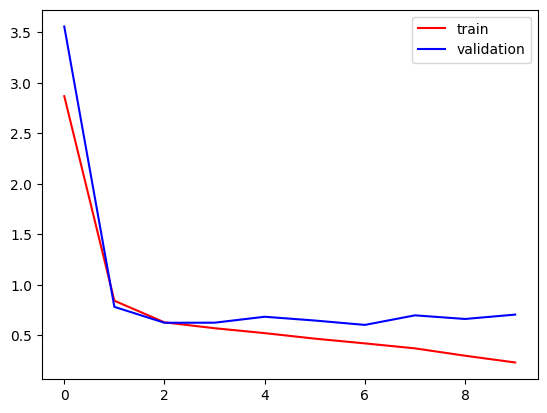

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [21]:
test_img=cv2.imread('/content/Cat_img.jpg')

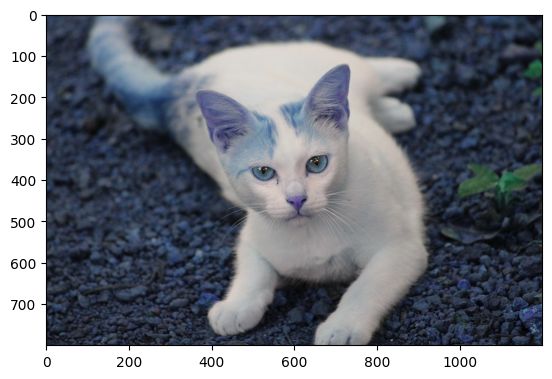

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(800, 1200, 3)

In [24]:
test_img=cv2.resize(test_img,(256,256))

In [25]:
test_input=test_img.reshape(1,256,256,3)

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 396ms/step


array([[1.]], dtype=float32)